# Examination signal plots
Code for plotting signal from all the examination phases of one participant.
Files in the dataset contain values from separate study phases and include any delays caused by application errors.
It means, that these files are continuous data for whole examinations.

Some data files in the dataset are missing, due to device problems.
The `data_completeness.csv` file, included in the dataset, contains information about these files.

## Setup


In [1]:
import configparser
import os
import matplotlib.pyplot as plt

from datetime import datetime
from helpers import load_json_file, BASELINE_PHASES, STUDY_PHASES, DATETIME_FORMAT, PARTICIPANTS_ID

def plot_signal(signal_data, label, time_lines=None, if_save=True, save_path='./'):
    plt.figure(figsize=(35, 15), dpi=300)
    plt.plot([datetime.strptime(x[0], DATETIME_FORMAT) for x in signal_data], [x[1] for x in signal_data])

    # vertical lines for marking next study phase
    if time_lines is not None:
        for time_line in time_lines[:-1]:
            plt.axvline(x=time_line, color='k', linestyle='--', alpha=0.75)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(' '.join(label.split('_')))
    if if_save:
        plt.savefig(f'{save_path}/{label}.png', bbox_inches='tight')
    else:
        plt.show()
    plt.close()


def plot_signal_for_participants(participants=PARTICIPANTS_ID, device='EMPATICA', signal='BVP',
                                 if_save=True, save_path='./'):
    for p_id in participants:
        signal_data, time_lines = [], []
        p_data = load_json_file(
            f'{dataset_path}/{p_id}/{p_id}_questionnaires.json')

        for movie in p_data['metadata']['movie_order']:
            if movie == 'BASELINE':
                phases = BASELINE_PHASES
            else:
                phases = STUDY_PHASES

            for study_phase in phases:
                try:
                    phase_data = load_json_file(f'{dataset_path}/{p_id}/{p_id}_{movie}_{study_phase}_{device}.json')
                    signal_data += phase_data[signal]
                    time_lines.append(datetime.strptime(phase_data[signal][0][0], DATETIME_FORMAT))
                except FileNotFoundError:
                    print(f'There is no file:\n'
                          f'{p_id}_{movie}_{study_phase}_{device}.json')
                    print('Check data_completness.csv file for information about missing files\n')

        plot_signal(signal_data, label=f'{signal}_{p_id}', time_lines=time_lines,
                    if_save=if_save, save_path=save_path)


config = configparser.ConfigParser()
config.read("config.ini")

if not os.path.exists(config['DataDirectories']['unzipped_dataset']):
    raise Exception("Please set path for unzipped dataset in config.ini")

dataset_path = config['DataDirectories']['unzipped_dataset']

## Plot chosen data

Set a list of participants, a device, and a signal to generate a plot.
Note that the first participant ID is 22, and the last is 64.
Dotted lines represent transitions between phases of the examination.

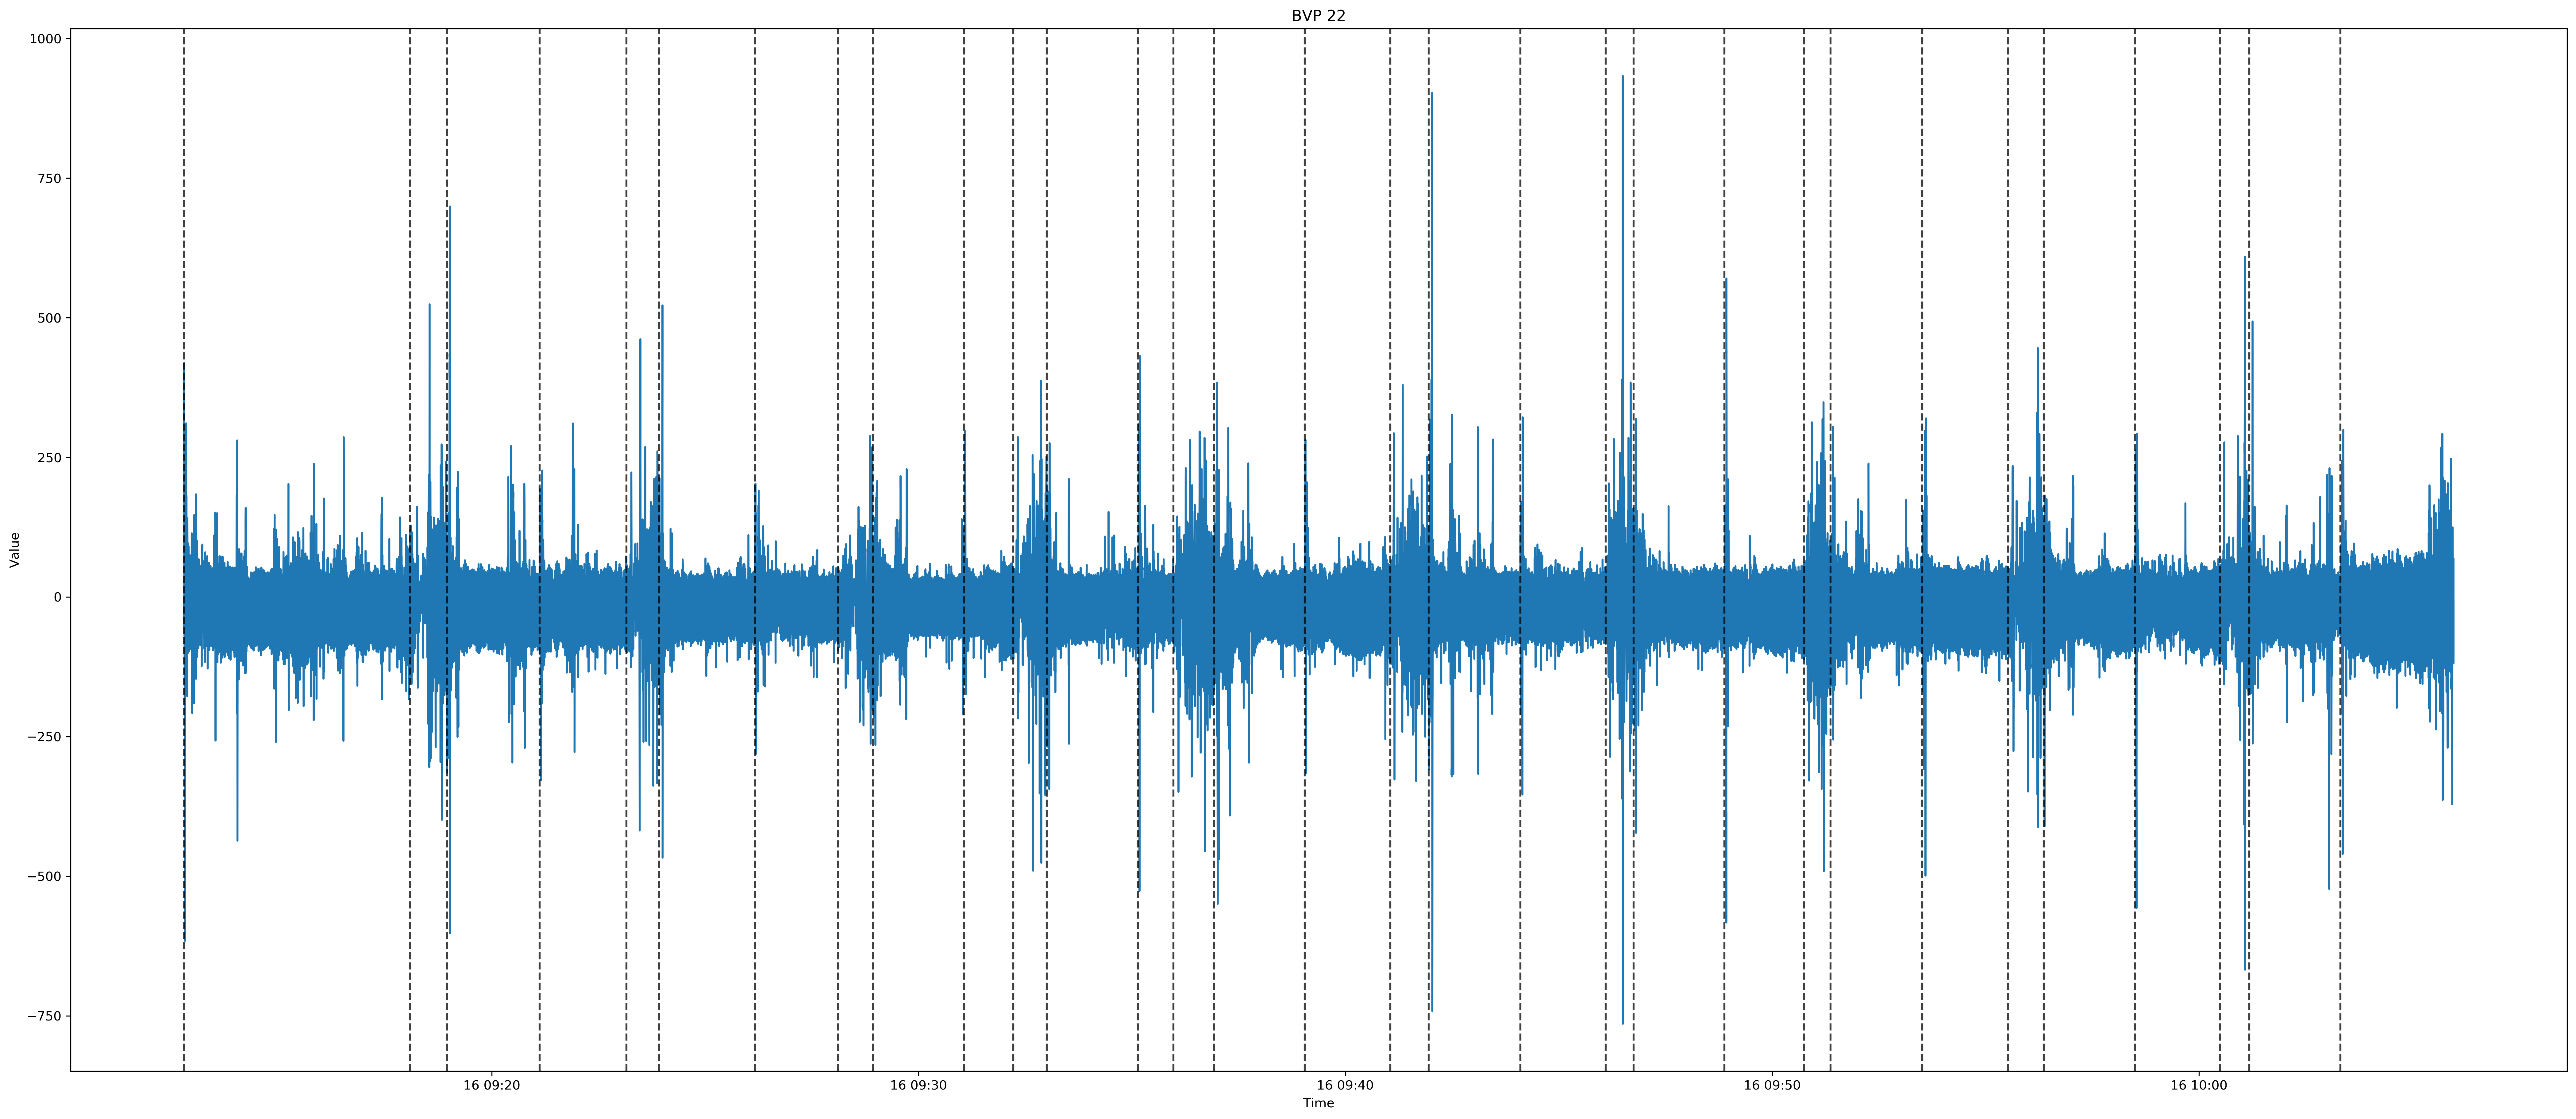

In [2]:
# avaiable devices with example data to plot
device_signal = {
    'EMPATICA': 'BVP',
    'SAMSUNG_WATCH': 'lightIntesity',
    'MUSE': 'RAW_AF7'
}

# all participants could be use with PARTICIPANTS_ID variable
plot_signal_for_participants(participants=[22], device='EMPATICA', signal='BVP', if_save=False)